# Data processing
Given the [csv file](https://raw.githubusercontent.com/Vadimkin/ukrainian-air-raid-sirens-dataset/main/datasets/full_data.csv?fbclid=PAAaY5H2U_sD9OaCQLZhl2r5KZs7xfUuVRoIvPdpG1oIV2yXimmE9jD1h27io). The task is 

- analyze the data by weeks (average frequency of alerts per week, their length) 
- analyze the data by days of the week (which day of the week has more air raid alerts or when their length has the greatest value)
- find the day(s) with the greatest number of the alerts
- find the day(s) with the longest alert
- depict the data of alerts on plot (choose any criteria for depicting you want)

Additional tasks: 
- analyze which weeks have more alerts the ones that in the beginning of month, in the middle or in the end
- find the region that has the greatest number of alerts
- analyze the alerts condition in your own region


In [6]:
import pandas as pd
import datetime
from dateutil import parser

In [41]:
df = pd.read_csv('full_data.csv')
df

,oblast,raion,hromada,level,started_at,finished_at
0,Vinnytska oblast,NaN,NaN,oblast,2022-03-15 16:10:34+00:00,2022-03-15 16:50:07+00:00
1,Zhytomyrska oblast,NaN,NaN,oblast,2022-03-15 16:11:25+00:00,2022-03-15 16:54:23+00:00
2,Cherkaska oblast,Umanskyi raion,Umanska terytorialna hromada,hromada,2022-03-15 16:11:50+00:00,2022-03-15 16:54:47+00:00
3,Mykolaivska oblast,Pervomaiskyi raion,m. Pervomaisk ta Pervomaiska terytorialna hromada,hromada,2022-03-15 16:14:46+00:00,2022-03-15 16:57:08+00:00
4,Kirovohradska oblast,NaN,NaN,oblast,2022-03-15 16:15:11+00:00,2022-03-15 16:54:52+00:00
...,...,...,...,...,...,...
16246,Zaporizka oblast,NaN,NaN,oblast,2022-11-22 20:14:36+00:00,2022-11-22 20:49:36+00:00
16247,Donetska oblast,NaN,NaN,oblast,2022-11-22 20:14:53+00:00,2022-11-22 20:50:49+00:00
16248,Khersonska oblast,NaN,NaN,oblast,2022-11-22 20:15:15+00:00,2022-11-22 20:49:16+00:00
16249,Dnipropetrovska oblast,NaN,NaN,oblast,2022-11-22 20:15:17+00:00,2022-11-22 20:48:47+00:00


In [42]:
# By weeks
datetime_time_started = [parser.parse(start) for start in df['started_at'] if not isinstance(start, float)]
datetime_time_ended = [parser.parse(end) for end in df['finished_at'] if not isinstance(end, float)]

In [43]:
# average frequency of alers per week
weeks_number = [start_time.isocalendar().week for start_time in datetime_time_started]
total_weeks_numbers = len(weeks_number)
avg_alert_per_week = sum(weeks_number) / total_weeks_numbers
avg_alert_per_week

26.773306258076428

In [44]:
# average length by week
alerts_length_total = [end - start for end, start in zip(datetime_time_ended, datetime_time_started)]
all_weeks = set(weeks_number)
alert_length_list_grouped_by_week_number = []
for week in all_weeks:
    week_list_alert_length = []
    for week_num, alert_length in zip(weeks_number, alerts_length_total):
        if week == week_num:
            week_list_alert_length.append(alert_length.seconds)
    alert_length_list_grouped_by_week_number.append(week_list_alert_length)


avg_length_alert_by_week = []
for alerts_in_seconds, week_number_in_year in zip(alert_length_list_grouped_by_week_number, all_weeks):
    avg_alert_time = str(datetime.timedelta(seconds=sum(alerts_in_seconds)/len(alerts_in_seconds)))
    avg_length_alert_by_week.append((week_number_in_year, avg_alert_time))
        
avg_length_alert_by_week

[(11, '1:12:36.263566'),
 (12, '1:21:17.124147'),
 (13, '0:59:49.627726'),
 (14, '0:40:43.419094'),
 (15, '0:49:55.566434'),
 (16, '0:58:30.940246'),
 (17, '0:56:01.304264'),
 (18, '1:03:40.834808'),
 (19, '0:55:37.357320'),
 (20, '1:11:50.859307'),
 (21, '0:59:16.548387'),
 (22, '1:01:59.263889'),
 (23, '0:56:12.770083'),
 (24, '0:54:03.051095'),
 (25, '0:53:46.767273'),
 (26, '0:46:29.983193'),
 (27, '0:49:26.003559'),
 (28, '0:57:42.995305'),
 (29, '1:03:06.841424'),
 (30, '1:03:37.433476'),
 (31, '1:02:49.954704'),
 (32, '0:42:17.419725'),
 (33, '0:48:28.497872'),
 (34, '0:50:26.129771'),
 (35, '0:49:32.200000'),
 (36, '0:52:56.970588'),
 (37, '0:44:45.303030'),
 (38, '0:48:35.246753'),
 (39, '0:53:22.245431'),
 (40, '1:07:18.707617'),
 (41, '1:38:52.104218'),
 (42, '1:39:17.284404'),
 (43, '1:16:04.011331'),
 (44, '1:19:56.840491'),
 (45, '1:06:09.608355'),
 (46, '1:50:43.090000'),
 (47, '1:19:24.083333')]

In [45]:
# longest alert in day of the week
longest_alert = alerts_length_total[0]
day_of_the_week = ''
for date_start, alert_length in zip(datetime_time_started, alerts_length_total):
    if alert_length.seconds > longest_alert.seconds:
        longest_alert = alert_length
        day_of_the_week = date_start
print(f"The longest alert was on week day {day_of_the_week.today().weekday()}, time - {str(longest_alert)}")

The longest alert was on week day 1, time - 1 day, 22:36:30


In [46]:
# Day with greatest amount of allerts 
from collections import Counter

def get_key(val, my_dict):
    for key, value in my_dict.items():
        if val == value:
            return key
    return

day_started = [start.strftime('%Y/%m/%d') for start in datetime_time_started]
amounts_of_allerts_dictionary = dict(Counter(day_started))
largest_amount_alerts = max(amounts_of_allerts_dictionary.values())
largest_amount_alerts_date = get_key(largest_amount_alerts, amounts_of_allerts_dictionary)
print(f'The maximum amount of alerts was on day {largest_amount_alerts_date}, amount - {largest_amount_alerts}')

The maximum amount of alerts was on day 2022/08/24, amount - 204


In [51]:
# day with the longest alert
day_started_alert_length = [(date, length.seconds) for date, length in zip(day_started, alerts_length_total)]
alert_in_seconds = 1
longest_alert = max(alert_length[alert_in_seconds:] for alert_length in day_started_alert_length)
longest_alert_date = ''
for day_start_alert in day_started_alert_length:
    if day_start_alert[alert_in_seconds:] == longest_alert:
        longest_alert_date = day_start_alert
        break
alert_time = str(datetime.timedelta(seconds=longest_alert_date[1]))
print(f'Longest alert was on {longest_alert_date[0]} with {alert_time} alert time')

Longest alert was on 2022/03/16 with 22:36:30 alert time


In [52]:
# plot (pie-chart of all alerts by regions)
import matplotlib.pyplot as plt
import numpy as np

In [53]:
count_alerts_by_oblast = dict(Counter(df['oblast']))
count_alerts_by_oblast

{'Vinnytska oblast': 396,
 'Zhytomyrska oblast': 430,
 'Cherkaska oblast': 627,
 'Mykolaivska oblast': 2419,
 'Kirovohradska oblast': 699,
 'Khmelnytska oblast': 266,
 'Kyivska oblast': 529,
 'Ivano-Frankivska oblast': 214,
 'Lvivska oblast': 214,
 'Rivnenska oblast': 264,
 'Volynska oblast': 261,
 'Kyiv City': 476,
 'Ternopilska oblast': 243,
 'Chernihivska oblast': 394,
 'Poltavska oblast': 750,
 'Donetska oblast': 1901,
 'Sumska oblast': 496,
 'Dnipropetrovska oblast': 1726,
 'Kharkivska oblast': 1562,
 'Odeska oblast': 540,
 'Zaporizka oblast': 1170,
 'Chernivetska oblast': 189,
 'Zakarpatska oblast': 183,
 'Luhanska oblast': 3,
 'Khersonska oblast': 299}

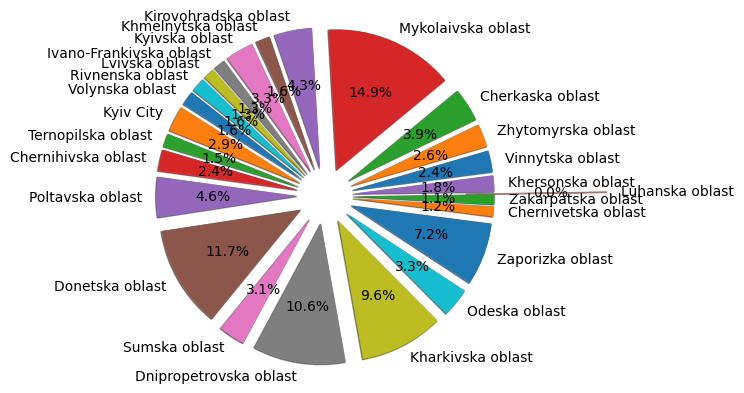

In [102]:
values = count_alerts_by_oblast.values()
labels = count_alerts_by_oblast.keys()
min_explode_chart = 1
max_explide_chart = 5
explode = tuple((max_explide_chart if val == min(values) else min_explode_chart for val in values))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=7.5, shadow=True, explode=explode, radius=5)

plt.axis('equal')
plt.show()